<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/SequenceModels/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Problems with CNN
  - Outputs are dependent on input
  - Inputs are of fixed length

# Sequence Model :
 - Prediction of words after certains letters
  - length is unknown
  - Output depends on previous output
  - Ex: 'Ze' -> 'Zebra' , 'Zen' , 'Zee'
 - Part of Speech tagging problem
  - Given input generate sentences based on previous output
  - Outof 10 words each word is assigned using OneHotEncode
    - game(index=3), play,...
    - Representation of game = [0 0 0 1 0 0 0 0 0 0]
 - Other example
  - Speech Recognition
  - Speech Recognition - Mood Classification
  - Video - Sequence of frame and - Classification

# Types  Sequence learning problem
 - Output at every stage - Word prediction : Output after every Sequence
  - $\hat y_t = \hat f(x_1,x_2,...x_t)$
 - Output at the end - Video Classification : Process many video frames and finally gives output - After many Sequence
  - $\hat y_T = \hat f(x_1,x_2,...x_T)$

- Function Properties:
  - $y_t$ is dependent on previous input
  - function can deal with variable number of inputs
  - Same function is executed at each and every time step

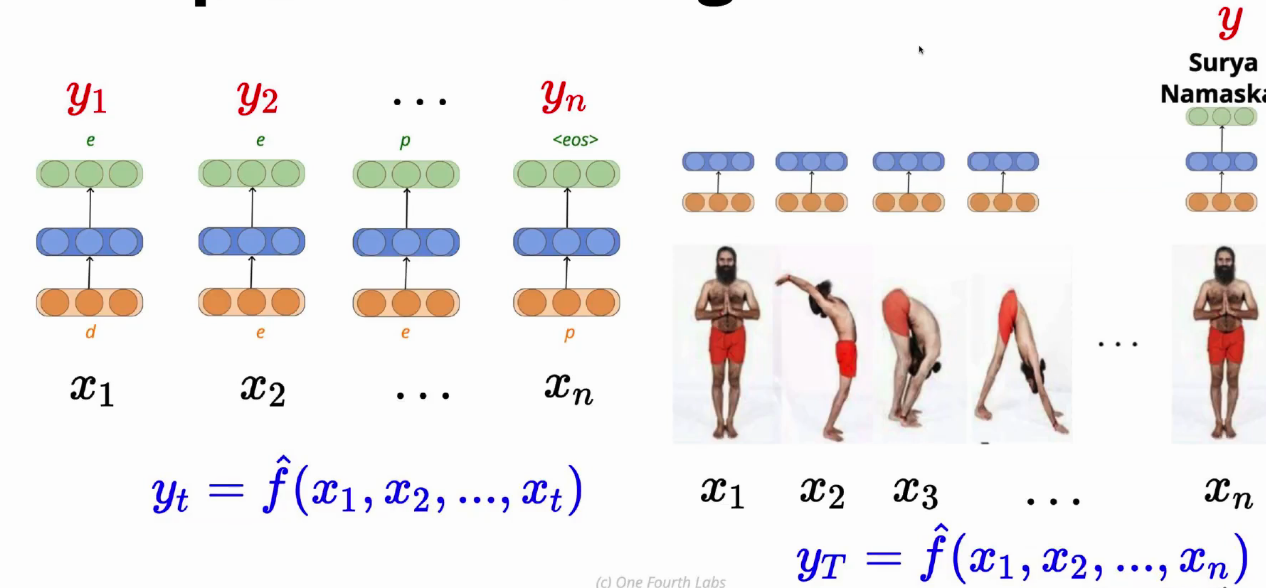

# Model:
$s_i = \sigma (Ux_i+b)$ \
$y_i = \sigma (Vs_i+c)$ \
**Note that weights and biases are same for each model - such parameter sharing approach shows dependecy**

One of the solution is to use all input by doing algera. But Originality of input will be lost. See image \

**Note : Don't DO **

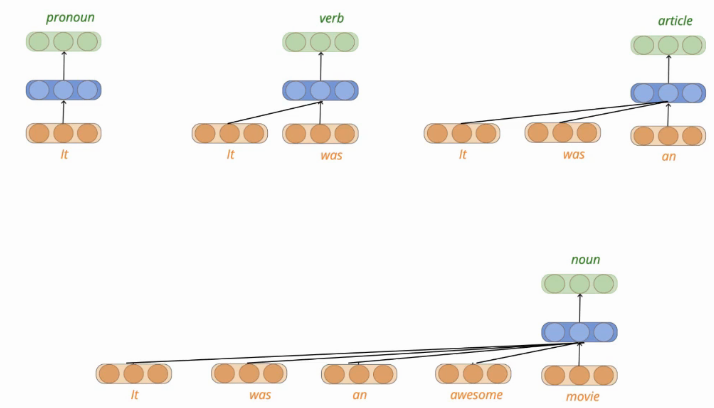

# Can we do better?
 
**Model :**
  - $s_i = \sigma (Ux_i+ Ws_{i-1}+b)$ \
  - $y_i = \sigma (Vs_i+c) = \hat f(x_i,s_{i-1},W,U,V,b,c) $\
**Note that weights and biases are same for each model**

n - inputs \
d - Hidden layer \
k - output \
$x_i \in \mathcal R ^{nX1}$ \
$s_{i-1} \in \mathcal R ^{dX1}$ \
$U \in \mathcal R ^{dXn}$ \
$W \in \mathcal R ^{dXd}$ \
$V \in \mathcal R ^{kXd}$ \

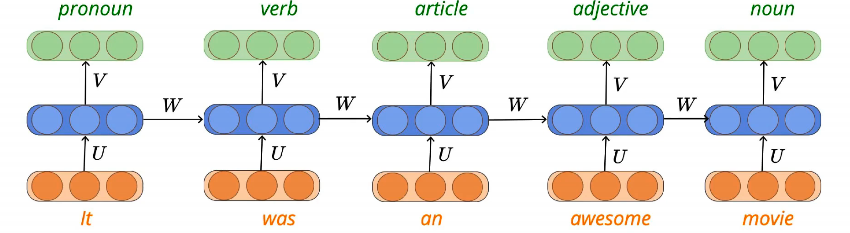

for example, \
$y_4 = \mathcal{O}(V s_4 + c) $  
$s_4 = \sigma (Ux_3 + W s_3 + b)$ \
$s_3 = \sigma (Ux_2 + W s_2 + b)$ \
$s_2 = \sigma (Ux_2 + W s_1 + b)$ \
$s_1 = \sigma (Ux_1 + W s_0 + b)$ \


# Model has recurrent connection among them -> Recuurent Neural Network

- How to represent words & char?
- Loss function?
- How to train?

### Data and Task
 - Sequence classification : sentiment classification, Video classification
 - Sequence labelling : part of speech tagging, named entity recoginition(like name of city, person in sentence)
 - Sequence generation : machine translation, transliteration (script change)

### Procedure:
  - Lower case all the words
  - compute the total number of unique words across all sentences
  - Assign unique id to each word
  - Represent each word using a L dimentional binary vector with only the bit corresponding to the word id set to 1 (OneHotCoder)

### Terms:
- $<sos>$ - start of statement
- $<eos>$ - end of statement
- $<pad>$ - padding

# Sequence Classification 

$\begin{bmatrix}
x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\
<sos> & Movie & was & great & . & <eos> & <pad> \\
<sos> & Awesome & movie & . & <eos> & <pad> & <pad>\\
<sos> & First & half & was & boring& . & <eos>  \\
<sos> & Beautiful & actress & ! & <eos> & <pad> & <pad>\\
\end{bmatrix}
=
\begin{bmatrix}
y\\
1\\
1\\
0\\
1\\
\end{bmatrix}
$

### Dictionary:
ID | Word | OneHotRepresentation
---|---|---
0 | \<sos\> | [ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
1 | \<eos\> | [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ]
2 | \<pad\> | [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ]
3 | movie | [ 0 0 0 1 0 0 0 0 0 0 0 0 0 0 ]
4 | was  | [ 0 0 0 0 1 0 0 0 0 0 0 0 0 0 ]
5 | great | [ 0 0 0 0 0 1 0 0 0 0 0 0 0 0 ]
6 | . | [ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ]
7 | awesome | [ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ]
8 | first | [ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ]
9 | half | [ 0 0 0 0 0 0 0 0 0 1 0 0 0 0 ]
10 | boring | [ 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ]
11 | beautiful | [ 0 0 0 0 0 0 0 0 0 0 0 1 0 0 ]
12 | actress | [ 0 0 0 0 0 0 0 0 0 0 0 0 1 0 ]
13 | ! | [ 0 0 0 0 0 0 0 0 0 0 0 0 0 1 ]


$\begin{bmatrix}
x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\
<sos> & Movie & was & great & . & <eos> & <pad> \\
<sos> & Awesome & movie & . & <eos> & <pad> & <pad>\\
<sos> & First & half & was & boring& . & <eos>  \\
<sos> & Beautiful & actress & ! & <eos> & <pad> & <pad>\\
\end{bmatrix}
= 
\begin{bmatrix}
x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\
0 & 3 & 4 & 5 & 6 & 1 & 2 \\
0 & 7 & 3 & 6 & 1 & 2 & 2\\
0 & 8 & 9 & 4 & 10 & 6 & 1  \\
0 & 11 & 12 & 13 & 1 & 2 & 2\\
\end{bmatrix}
$

## OneHotEncoded Final Matrix Form
$
\begin{bmatrix}
x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\
[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 1 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 1 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 1 0 0 0 0 0 0 0 0 ]& [ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ] & [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ]\\
[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ] & [ 0 0 0 1 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ] & [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ]\\
[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 0 0 1 0 0 0 0 ] & [ 0 0 0 0 1 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ] & [ 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ] & [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ]  \\
[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 0 0 0 0 0 0 0 0 0 1 0 0 ] & [ 0 0 0 0 0 0 0 0 0 0 0 0 1 0 ] & [ 0 0 0 0 0 0 0 0 0 0 0 0 0 1 ] & [ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ] & [ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ]\\
\end{bmatrix}
$

### Is adding padding to matrix change output?
- Padding is just to create compatible input to generate matrix
- Generally output is generated at the end of the sequence

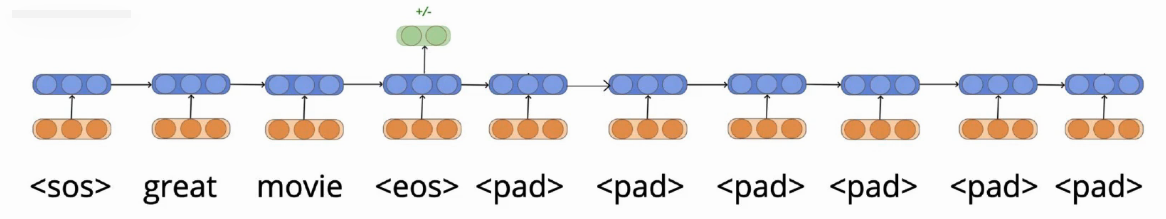

### Similar Procedure can be done for y matrix if outputs are multiple.

# Model:
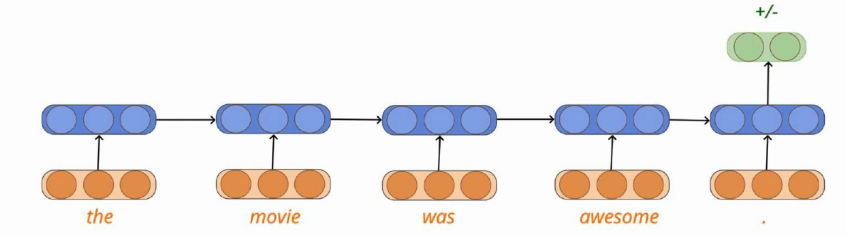

# Loss Function:

$\mathcal{L} = - \frac{1}{m}\sum_i^m \sum_j^T \log y_{ijc}$

m = number of similar function (above 5)\
T = total size of output in OneHotEncoder

# Algorithm:

- Initialize: $w_1, w_2,..,w_n $ & $b$
- Iterate over data: 
    - compute $\hat y$
    - compute Loss $\mathcal{L} (w,b)$
    - $w_{11} = w_{11} + \eta \Delta w_{11} $ \
    - $w_{12} = w_{12} + \eta \Delta w_{12} $ \
    - $u_{11} = u_{11} + \eta \Delta u_{11} $ \
    - $\cdot$
    - $\cdot$
    - $v_{13} = v_{13} + \eta \Delta v_{13} $ \
    - till satisfied 
  

### How to calculate gradients?

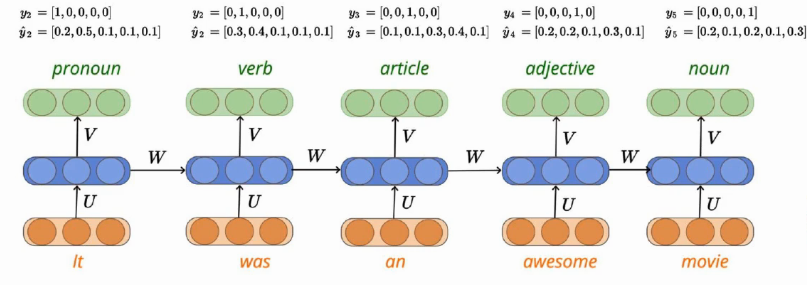

$\mathcal{L} = - \frac{1}{m}\sum_i^m \sum_j^T \log y_{ijc} $

## Derivative w.r.t V

Generally FNN,
$\frac{\partial \mathcal{L}}{\partial V} = \frac{\partial \mathcal{L}}{\partial \hat y} \cdot \frac{\partial \hat y} {\partial a_2} \cdot  \frac{\partial a_2} {\partial V}$

In case of RNN,
$\frac{\partial \mathcal{L}}{\partial V} = \frac{\partial \mathcal{L_1}}{\partial V} + \frac{\partial \mathcal{L_2}}{\partial V} +  \frac{\partial \mathcal{L_3}}{\partial V} + \frac{\partial \mathcal{L_4}}{\partial V} + \frac{\partial \mathcal{L_5}}{\partial V} $

Now for all partial derivative should be calculated individually and summed up.

$\frac{\partial \mathcal{L}}{\partial V} = \frac{\partial \mathcal{L_1}}{\partial \hat y_1} \cdot \frac{\partial \hat y_1} {\partial a_{21}} \cdot  \frac{\partial a_{21}} {\partial V} + \frac{\partial \mathcal{L_2}}{\partial \hat y_2} \cdot \frac{\partial \hat y_2} {\partial a_{22}} \cdot  \frac{\partial a_{22}} {\partial V} +  \frac{\partial \mathcal{L_3}}{\partial \hat y_3} \cdot \frac{\partial \hat y_3} {\partial a_{23}} \cdot  \frac{\partial a_{23}} {\partial V} + \frac{\partial \mathcal{L_4}}{\partial \hat y_4} \cdot \frac{\partial \hat y_4} {\partial a_{24}} \cdot  \frac{\partial a_{24}} {\partial V} + \frac{\partial \mathcal{L_5}}{\partial \hat y_5} \cdot \frac{\partial \hat y_5} {\partial a_{25}} \cdot  \frac{\partial a_{25}} {\partial V} $



## Derivative w.r.t W
$\frac{\partial \mathcal{L}}{\partial W} = \frac{\partial \mathcal{L_1}}{\partial W} + \frac{\partial \mathcal{L_2}}{\partial W} +  \frac{\partial \mathcal{L_3}}{\partial W} + \frac{\partial \mathcal{L_4}}{\partial W} + \frac{\partial \mathcal{L_5}}{\partial W} $


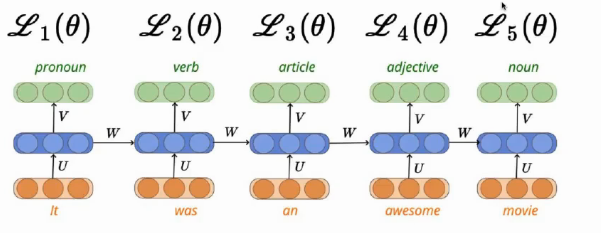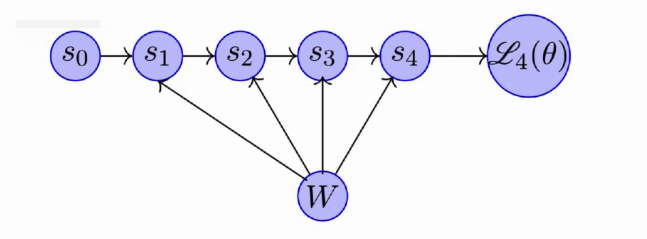


$\frac{\partial \mathcal{L_4}}{\partial W} = \frac{\partial \mathcal{L_4}}{\partial s_4} \cdot \frac{\partial s_4} {\partial W} $

$\frac{\partial s_4} {\partial W}  = \frac{\partial s_4} {\partial W}+\frac{\partial s_4} {\partial s_3} \cdot \frac{\partial s_3} {\partial W} +\frac{\partial s_4} {\partial s_3}  \cdot \frac{\partial s_3} {\partial s_2} \cdot \frac{\partial s_3} {\partial W} + \frac{\partial s_4} {\partial s_3}  \cdot \frac{\partial s_3} {\partial s_2}  \cdot \frac{\partial s_3} {\partial s_1} \cdot \frac{\partial s_1} {\partial W}$

$\frac{\partial s_4} {\partial W}  = \frac{\partial s_4}{\partial s_4} \frac{\partial s_4}  {\partial W}+\frac{\partial s_4} {\partial s_3} \cdot \frac{\partial s_3} {\partial W} +\frac{\partial s_4}  {\partial s_2} \cdot \frac{\partial s_2} {\partial W} + \frac{\partial s_4}  {\partial s_1} \cdot \frac{\partial s_1} {\partial W}$

$\frac{\partial s_4} {\partial W}  = \sum_{k=1}^{4} \frac{\partial s_4}  {\partial s_k} \cdot \frac{\partial s_k} {\partial W}$


**General Form:**

$\frac{\partial \mathcal{L}_t(\theta)} {\partial W}  = \frac{\partial \mathcal{L}_t(\theta)} {\partial s_t}\sum_{k=1}^{t} \frac{\partial s_t}  {\partial s_k} \cdot \frac{\partial s_k} {\partial W}$



### Evaluation:
 - Overall Accuracy
 - Accuracy per class
 - Confusion Matrix
 

# Exploding/Vanishing  Gradient Problem

$\frac{\partial \mathcal{L}_t(\theta)} {\partial W}  = \frac{\partial \mathcal{L}_t(\theta)} {\partial s_t}\sum_{k=1}^{t} \frac{\partial s_t}  {\partial s_k} \cdot \frac{\partial s_k} {\partial W}$

Here, term $\frac{\partial s_t}  {\partial s_k}$ contains chain of gradinets,\
$ \frac{\partial s_t}  {\partial s_k} = \frac{\partial s_t}  {\partial s_{t-1}} \cdot \frac{\partial s_{t-1}}  {\partial s_{t-2}} \cdot \frac{\partial s_{t-2}}  {\partial s_{t-3}} \dots \frac{\partial s_{k+1}}  {\partial s_{k}} = \Pi_{j=k+1}^t \frac{\partial s_j}  {\partial s_{j-1}}$

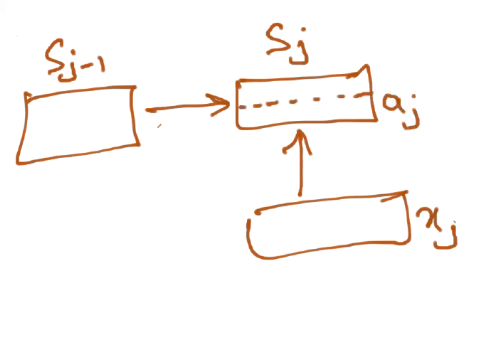

Above term $\frac{\partial s_j}{\partial s_{j-1}}$ can be expressed as below,

$\frac{\partial s_j}{\partial s_{j-1}} = \frac{\partial s_j}{\partial a_{j}} \cdot \frac{\partial a_j}{\partial s_{j-1}}$

now, \
$a_j = [a_{j1},a_{j2},a_{j3},...,a_{jd}]$ \
$s_j = [\sigma(a_{j1}),\sigma(a_{j2}),\sigma(a_{j3}),...,\sigma(a_{jd})]$ \


**Maths**

$
z_1 = f(x,y)\\
z_2 = f(x,y,w)\\
z =[z_1 , z_2]\\
k =[x,y,w]\\
$

$\frac{\partial z}{\partial k} \rightarrow \frac{\mathbb{R}^2}{\mathbb{R}^3} \rightarrow \text{will generate matrix of size 3X2}$


$
\frac{\partial s_j}{\partial a_j}
= 
\begin{bmatrix}
\frac{\partial s_{j1}}{\partial a_{j1}} & \frac{\partial s_{j2}}{\partial a_{j2}}
& \frac{\partial s_{j3}}{\partial a_{j3}} & \dots \\
\frac{\partial s_{j1}}{\partial a_{j1}} & \frac{\partial s_{j2}}{\partial a_{j2}}
& \ddots & \vdots \\
\vdots & \vdots
& \vdots & \frac{\partial s_{jd}}{\partial a_{jd}} \\
\end{bmatrix}
=
\begin{bmatrix}
\sigma '(a_{j1}) & 0
& 0 & 0 \\
0&\sigma '(a_{j2}) & 0
& 0  \\
0&0&\ddots & 0
& \\
0 & 0
& \dots & \sigma '(a_{jd}) \\
\end{bmatrix}
=diag(\sigma '(a_{j}))
$

so,

$\frac{\partial s_j}{\partial s_{j-1}} = \frac{\partial s_j}{\partial a_{j}} \cdot \frac{\partial a_j}{\partial s_{j-1}}$\
$\frac{\partial s_j}{\partial s_{j-1}} = diag(\sigma '(a_{j})) \cdot \frac{\partial a_j}{\partial s_{j-1}}$


also, \
$a_j = Ux_j + Ws_{j-1} + b$ \
$s_j = \sigma(a_j)$

$\frac{\partial s_j}{\partial s_{j-1}} = diag(\sigma '(a_{j})) \cdot W$


Now, value of derivative depends on the W.\
$W = W + \eta \frac{\partial \mathcal{L}}{\partial W }$ so, wrong change in derivation can also affect $\frac{\partial s_j}{\partial s_{j-1}}$.

so, Mangitude of gradient is important factor.

$||\frac{\partial s_j}{\partial s_{j-1}}|| = ||diag(\sigma '(a_{j})) \cdot W|| \leq ||diag(\sigma '(a_{j}))|| ||W||$

as, \
$\sigma '(a_{j}) \leq \frac{1}{4} = \gamma$ [if $\sigma$ is logistic] \
$\sigma '(a_{j}) \leq 1 = \gamma$ [if $\sigma$ is tanh]

$||\frac{\partial s_j}{\partial s_{j-1}}|| \leq \gamma  ||W|| \leq \gamma \lambda$

$||\frac{\partial s_t}{\partial s_{k}}|| = ||\Pi_{j=k+1}^t \frac{\partial s_j}{\partial s_{j-1}}|| \leq \Pi_{j=k+1}^t \gamma \lambda \leq (\gamma \lambda)^{t-k}$

if,\
$\gamma \lambda > 1 : $ Exploding Gradient

if,\
$\gamma \lambda < 1 :$ Vanishing gradient

**This Problem can be solve used LSTM and GRU.**